# Informações Relevantes sobre os dados

Esse *dataset* foi disponibilizado publicamente no site da UCI Machine Learning Repository, disponível em: <http://archive.ics.uci.edu/ml/datasets/Bank+Marketing>. 

Os dados foram coletados do Banco de Portugal, em: <https://www.bportugal.pt/estatisticasweb>


# Variáveis Analisadas

### Características dos clientes:

1 - [idade] age (numeric)

2 - [emprego] job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - [estado_civil] marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - [educação] education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - [inadimplência] default: has credit in default? (categorical: "no","yes","unknown")

6 - [empréstimo_imobiliario] housing: has housing loan? (categorical: "no","yes","unknown")

7 - [empréstimo]: has personal loan? (categorical: "no","yes","unknown")

### Último contato feito:

8 - [forma_contato] contact: contact communication type (categorical: "cellular","telephone") 

9 - [mês_contato] month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - [dia_contato] day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - [duração_contato] duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Outros atributos do cliente na campanha:

12 - [num_contatos] campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - [dias_ultimo_contato] pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - [contatos_anteriores] previous: number of contacts performed before this campaign and for this client (numeric)

15 - [resultado_anterior] poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Contexto socioeconômico dos clientes:

16 - [indice_desemprego] emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - [CPI] cons.price.idx: consumer price index - monthly indicator (numeric)     

18 - [CCI] cons.conf.idx: consumer confidence index - monthly indicator (numeric)  

19 - [Euribor] euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - [num_empregados] nr.employed: number of employees - quarterly indicator (numeric)

### Variável-Alvo:

21 - [resultado] y: has the client subscribed a term deposit? (binary: "yes","no")

# Valores Faltantes

Todos os valores faltantes foram imputados como "unknown".

# Importação de Dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dados = pd.read_csv("../dados/bank-additional-full.csv", sep=";")

dados = dados.rename(columns={
    "age":"idade",
    "job":"emprego",
    "marital":"estado_civil",
    "education":"educacao",
    "default":"inadimplencia",
    "housing":"emprestimo_imobiliario",
    "loan":"emprestimo",
    "contact":"forma_contato",
    "month":"mes_contato",
    "day_of_week":"dia_contato",
    "duration":"duracao_contato",
    "campaign":"num_contatos",
    "pdays":"dias_ultimo_contato",
    "previous":"contatos_anteriores",
    "poutcome":"resultado_anterior",
    "emp.var.rate":"indice_desemprego",
    "cons.price.idx":"CPI",
    "cons.conf.idx":"CCI",
    "euribor3m":"Euribor",
    "nr.employed":"num_empregados",
    "y":"resultado"
})
dados.head()

,idade,emprego,estado_civil,educacao,inadimplencia,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,...,num_contatos,dias_ultimo_contato,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Limpeza de Dados

Devemos verificar:
* estrutura
* granularidade
* escopo
* temporalidade
* corretude

Operações:
* Limpeza de NAs
* padronizações
* tipagem

## Lidando com os NA's

Os dados faltantes das colunas de "Características dos Clientes" foram imputados com a palavra "unknown". Para tratá-los, precisamos transformá-los em NaNs.

Além disso, os valores faltantes da coluna "pdays" foram imputados com "999". 

In [3]:
df = dados.copy()
df = df.apply(lambda x: x.replace('unknown', np.nan))
df["dias_ultimo_contato"] = df["dias_ultimo_contato"].replace(999, np.nan)

In [4]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   41188 non-null  int64  
 1   emprego                 40858 non-null  object 
 2   estado_civil            41108 non-null  object 
 3   educacao                39457 non-null  object 
 4   inadimplencia           32591 non-null  object 
 5   emprestimo_imobiliario  40198 non-null  object 
 6   emprestimo              40198 non-null  object 
 7   forma_contato           41188 non-null  object 
 8   mes_contato             41188 non-null  object 
 9   dia_contato             41188 non-null  object 
 10  duracao_contato         41188 non-null  int64  
 11  num_contatos            41188 non-null  int64  
 12  dias_ultimo_contato     1515 non-null   float64
 13  contatos_anteriores     41188 non-null  int64  
 14  resultado_anterior      41188 non-null

Podemos observar que há valores faltantes nas colunas "inadimplência", "educação", "emprego", "empréstomo_imobiliário", "empréstimo" e "dias_último_contato". Vamos verificar o quanto isso representa do total de amostras, individualmente.

In [5]:
tmp = df[["inadimplencia", "educacao", "emprego", "emprestimo_imobiliario", "emprestimo", "dias_ultimo_contato"]]
tmp.isna().sum().sort_values(ascending=False)/len(df)

dias_ultimo_contato       0.963217
inadimplencia             0.208726
educacao                  0.042027
emprestimo_imobiliario    0.024036
emprestimo                0.024036
emprego                   0.008012
dtype: float64

As colunas que contém +5% de NA's em relação à quantidade total de observações são: "default" e "pdays". Vamos verificar a correlação entre elas e o alvo. Caso não seja significante (+5%), optaremos por apagá-las assumindo que não haverá perda de informação.

Já as outras colunas contém uma baixa quantidade de dados faltantes, por isso é razoável remover todas as linhas que contenham ao menos um dado faltante.

In [6]:
tmp = df[["dias_ultimo_contato","resultado"]]
tmp = tmp.apply(lambda x: x.replace('no', 0))
tmp = tmp.apply(lambda x: x.replace('yes', 1))

print("correlação dias_ultimo_contato-resultado:", tmp.corr()["resultado"][0].round(2))

tmp = df[["inadimplencia","resultado"]]
tmp = tmp.apply(lambda x: x.replace('no', 0))
tmp = tmp.apply(lambda x: x.replace('yes', 1))

print("correlação inadimplencia-resultado:", tmp.corr()["resultado"][0].round(2))

df.drop(["inadimplencia", "dias_ultimo_contato"], axis=1, inplace=True) # apaga as colunas
df.dropna(inplace=True) # apaga os NA's das linhas restantes

correlação dias_ultimo_contato-resultado: -0.04
correlação inadimplencia-resultado: -0.0


# Análise Exploratória dos Dados (apontar padrões e formular perguntas)

Vamos verificar a maneira como os dados estão descritos.

O primeiro ponto a se considerar é de que o pandas realiza a tipagem das colunas de forma automática. Nesse sentido, caso haja algum NA na coluna, o csv viria com "unknown" e por conta dessa string, todos os dados da coluna seriam convertidos para o tipo "object", ou seja, não numérico. Como as únicas colunas que continham NA's são categóricas não ordinais, nenhuma tipagem foi feita de maneira errada. 

Dessa forma, a partir da função `df.info`, podemos verificar que as variáveis que contém números são: 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'. Ao visualizá-las, confirma-se que as variáveis  


In [7]:
print("Nomes das colunas: ", list(df.columns))
df.iloc[:, 9:19].head() # Colunas numéricas
# fazer analises

Nomes das colunas:  ['idade', 'emprego', 'estado_civil', 'educacao', 'emprestimo_imobiliario', 'emprestimo', 'forma_contato', 'mes_contato', 'dia_contato', 'duracao_contato', 'num_contatos', 'contatos_anteriores', 'resultado_anterior', 'indice_desemprego', 'CPI', 'CCI', 'Euribor', 'num_empregados', 'resultado']


,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado
0,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Visualização das estatísticas descritivas

In [8]:
df.describe(include="object") # Categóricas

,emprego,estado_civil,educacao,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,resultado_anterior,resultado
count,38245,38245,38245,38245,38245,38245,38245,38245,38245,38245
unique,11,3,7,2,2,2,10,5,3,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,nonexistent,no
freq,9937,23183,11821,20578,32286,24441,12794,8011,33066,33987


In [9]:
df.describe() # Numéricas

,idade,duracao_contato,num_contatos,contatos_anteriores,indice_desemprego,CPI,CCI,Euribor,num_empregados
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Testes de Hipótese

## 1) Diferença de médias (bootstrap) entre o estado civil, idade, classe social e educação

In [10]:
tmp.head()

,inadimplencia,resultado
0,0.0,0
1,NaN,0
2,0.0,0
3,0.0,0
4,0.0,0


Text(0.5, 1.0, 'Aceitaram')

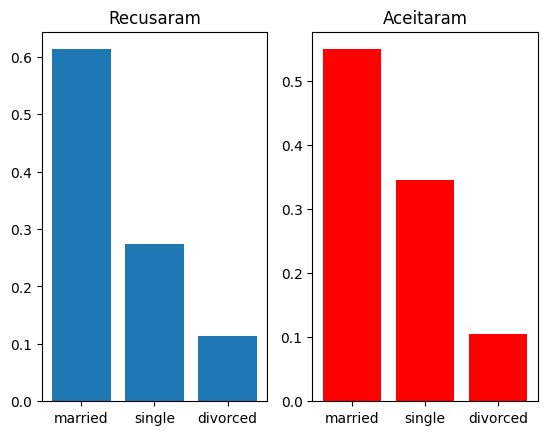

In [16]:
tmp1 = df[df["resultado"] == 'no']["estado_civil"]
tmp2 = df[df["resultado"] == 'yes']["estado_civil"]
tmp1 = tmp1.value_counts()
tmp2 = tmp2.value_counts()
ind = tmp1.index.tolist()
tmp1 = tmp1/tmp1.sum() 
tmp2 = tmp2/tmp2.sum() 
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(ind,tmp1)
ax1.set_title('Recusaram')
ax2.bar(ind, tmp2, color='r')
ax2.set_title('Aceitaram')


In [ ]:
def bootstrap_diff_mean(vet_1, vet_2, n=1000):
    size1, size2 = len(vet_1), len(vet_2)
    values_diff = np.zeros(n)
    for i in range(n):
        np.random.seed(i)
        sample1 = np.random.choice(vet_1, size=size1, replace=True)
        sample2 = np.random.choice(vet_2, size=size2, replace=True)
        values_diff[i] = sample1.mean() - sample2.mean()
    
    pct_inf = np.percentile(values_diff, 2.5)
    pct_sup = np.percentile(values_diff, 97.5)

    return pct_inf.round(4), pct_sup.round(4)

In [ ]:
tmp1 = df[df["y"] == 'no']
tmp1 = tmp1["marital"].replace("divorced", "single")
tmp1 = np.where(tmp1 == "married", 1, 0)

tmp2 = df[df["y"] == 'yes']
tmp2 = tmp2["marital"].replace("divorced", "single")
tmp2 = np.where(tmp2 == "married", 1, 0)

print("IC para média entre casados:", bootstrap_diff_mean(tmp1, tmp2))

IC para média entre casados: (0.0474, 0.0791)


In [ ]:
tmp1 = df[df["y"] == 'no']
tmp1 = tmp1["marital"].replace("divorced", "single")
tmp1 = np.where(tmp1 == "married", 1, 0)
tmp2 = df[df["y"] == 'yes']
tmp2 = tmp2["marital"].replace("divorced", "single")
tmp2 = np.where(tmp2 == "married", 1, 0)

print("IC para média entre divorciados e solteiros:", bootstrap_diff_mean(tmp1, tmp2))

IC para média entre casados e solteiros: (0.0474, 0.0791)


## 2) diferença de média (permutação) de acerto da campanha entre sexta e os demais dias

## 3) prob (bootstrap pra média ou testar normalidade no caso clássico) alguém com default aceitar a proposta

# Problema de Pesquisa